## Two-electron, two-site Hubbard model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def hubbardE(t,i,U=1.4):
    H = np.array([[0, 0,0,0, 0, 0],
                  [0, 0,0,0,-t,-t],
                  [0, 0,0,0, t, t],
                  [0, 0,0,0, 0, 0],
                  [0,-t,t,0, U, 0],
                  [0,-t,t,0, 0, U]])
    E,V = np.linalg.eig(H)
    E.sort()
    return([E[i]])

The 6 eigenstates and their eigenenergies are:

$$
\begin{align}
\mathbf{T_+} &= \;\mid\uparrow,\uparrow\rangle &: 0\\
\mathbf{T_0} &= \frac{1}{\sqrt{2}}\big(\mid\uparrow,\downarrow\rangle+\mid\downarrow,\uparrow\rangle\big) &: 0\\
\mathbf{T_-} &= \;\mid\downarrow,\downarrow\rangle &: 0\\
\mathbf{S_0} &= \frac{1}{\sqrt{2+\frac{8t^2}{E_{S_0}^2}}}\big(\frac{2t}{E_{S_0}}\big(\mid\uparrow,\downarrow\rangle-\mid\downarrow,\uparrow\rangle\big)-\big(\mid\uparrow\downarrow,0\rangle+\mid0,\uparrow\downarrow\rangle\big) &: \frac{1}{2}\big(U-\sqrt{16t^2+U^2}\big)\big)\\
\mathbf{S_1} &= \frac{1}{\sqrt{2}}\big(\mid\uparrow\downarrow,0\rangle-\mid0,\uparrow\downarrow\rangle\big) &: U\\
\mathbf{T_1} &= \frac{1}{\sqrt{2+\frac{8t^2}{E_{T_1}^2}}}\big(\frac{2t}{E_{T_1}}\big(\mid\uparrow,\downarrow\rangle-\mid\downarrow,\uparrow\rangle\big)-\big(\mid\uparrow\downarrow,0\rangle+\mid0,\uparrow\downarrow\rangle\big) &: \frac{1}{2}\big(U+\sqrt{16t^2+U^2}\big)\big)\\
\end{align}
$$

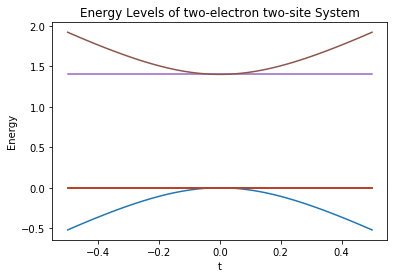

In [3]:
E0,E1,E2,E3,E4,E5 = [],[],[],[],[],[]
T = np.linspace(-0.5,0.5,50)
for t in T:
    E0.append(hubbardE(t,0))
    E1.append(hubbardE(t,1))
    E2.append(hubbardE(t,2))
    E3.append(hubbardE(t,3))
    E4.append(hubbardE(t,4))
    E5.append(hubbardE(t,5))

fig1 = plt.figure(1)
ax = fig1.gca()
ax.plot(T,E0)
ax.plot(T,E1)
ax.plot(T,E2)
ax.plot(T,E3)
ax.plot(T,E4)
ax.plot(T,E5)
ax.set_title("Energy Levels of two-electron two-site System")
ax.set_ylabel("Energy")
ax.set_xlabel("t")
plt.show()

With the eigevalues/energies calculated we can plot the evolution of the state $\;\mid\uparrow\downarrow,0\rangle$.

Express the state in terms of the eigenstates above:
$$\;\mid\uparrow\downarrow,0\rangle(t) = \frac{\sqrt{\frac{E_{T_1}^2}{2}+2t^2}}{E_{S_0}-E_{T_1}}\mathbf{T_1}\cdot e^{iE_{T_1}t/\hbar} - 
\frac{\sqrt{\frac{E_{S_0}^2}{2}+2t^2}}{E_{S_0}-E_{T_1}}\mathbf{S_0}\cdot e^{iE_{S_0}t/\hbar} +
\frac{1}{\sqrt{2}}\mathbf{S_1}\cdot e^{iE_{S_1}t/\hbar}$$


In [113]:
t = 0.2
U = 1.4

H = np.array([[0, 0,0,0, 0, 0],
              [0, 0,0,0,-t,-t],
              [0, 0,0,0, t, t],
              [0, 0,0,0, 0, 0],
              [0,-t,t,0, U, 0],
              [0,-t,t,0, 0, U]])
E,V = np.linalg.eig(H)
E_tm, T_m = E[5], V[:,5]
E_tp, T_p = E[4], V[:,4]
E_t0, T_0 = E[3], V[:,3]
E_s0, S_0 = E[2], V[:,2]
E_s1, S_1 = E[1], V[:,1]
E_t1, T_1 = E[0], V[:,0]

In [114]:
def D(x):
    global E_t1,E_s1,E_s0,t
    return (0.5*E_t1**2+2*t**2)**0.5/(E_s0-E_t1)*T_1*np.exp(1j*E_t1*x) - (0.5*E_s0**2+2*t**2)**0.5/(E_s0-E_t1)*S_0*np.exp(1j*E_s0*x) + (1/2)**0.5*S_1*np.exp(1j*E_s1*x)

In [115]:
def UD(x):
    global E_t1,E_t0,E_s0E_t1,t
    return (E_t1/(2*t))*(0.5*E_s0**2+2*t**2)**0.5/(E_t1-E_s0)*S_0*np.exp(1j*E_s0*x) - (E_s0/(2*t))*(0.5*E_t1**2+2*t**2)**0.5/(E_t1-E_s0)*T_1*np.exp(1j*E_t1*x) + (1/2)**0.5*T_0 - (1/200)**0.5*S_1*np.exp(1j*E_s1*x)

In [116]:
doubleL, doubleR, updown, downup = [], [], [], []
time = np.linspace(0,100,1000)
for a in time:
    doubleL.append(abs(D(a)[4]))
    doubleR.append(abs(D(a)[5]))
    updown.append(abs(D(a)[1]))
    downup.append(abs(D(a)[2]))

<IPython.core.display.Javascript object>


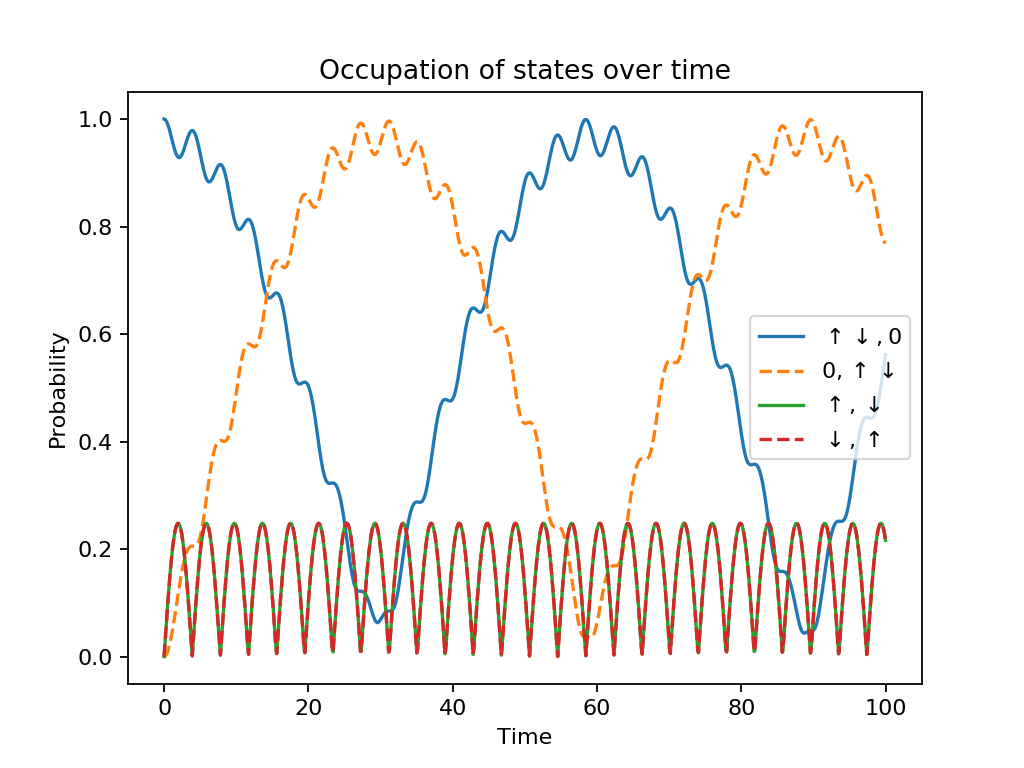

In [117]:
fig2 = plt.figure(2)
ax2 = fig2.gca()
ax2.plot(time,doubleL, label=r'$\uparrow\downarrow,0$')
ax2.plot(time,doubleR, '--', label=r'$0,\uparrow\downarrow$')
ax2.plot(time,updown, label=r'$\uparrow,\downarrow$')
ax2.plot(time,downup, '--', label=r'$\downarrow,\uparrow$')
ax2.legend()
ax2.set_ylabel('Probability')
ax2.set_xlabel('Time')
ax2.set_title(r'Occupation of states over time')
plt.show()

In this model, the electrons hop from being on one site to the other via the $\mid\downarrow,\uparrow\rangle$ and $\mid\uparrow,\downarrow\rangle$ states as shown in the plot above.